# Hej

Denne notebook indeholder alt! Alle de store bruger denne notebook

# TODO
- Import af excel data, formater, kode område navne til ting "man forstår"
- Tilføj kolonne om industri eller konsum
- Tilføj række med priser de enkelte år (MÅSKE til sidst)
- Cirkel diagrammer af hvad vi fanger total og i alle farvande (PLOT ALLE CIRKLER PÅ EN GANG)
- Index kurver og total fangst (DROPDOWN MENUER)
- Vækstrate beregninger (ikke nødvendigt)
- Summerende statistik


Katrine:
Cirkeldiagrammer

Mikkel:
Index kurver og total fangst (med dropdown menuer)

Johannes:
Kolonne som skal fortælle om industri
Søjle/stablet søjle som fortæller  noget om sammensætning af industrik/konsum i farevandet 

# Indlæs Data

In [49]:
#First we import relevant packages needed downlaod and open the zipfile
import zipfile
import urllib.request
import shutil
import pandas as pd

#URL (wepbage) and file_name specifies
url = 'http://www.ices.dk/marine-data/Documents/CatchStats/OfficialNominalCatches.zip'
file_name = 'OfficialNominalCatches.zip'

#We "call" the zip-filee from the url by using urllib.request
with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall()

In [50]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("ICESCatchDataset2006-2016.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Species,Area,Units,Country,2016,2015,2014,2013,2012,2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#rename columns to avoid having only numbers
yearDict = {}
for i in range(2006, 2017): # range goes from 2006 to but not including 2017
    yearDict[str(i)] = f'y{i}' 

data.rename(columns = yearDict, inplace=True)
data.head()

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#Drop columns if all values are NaN
data.dropna(axis="columns", how="all", inplace=True)
data.head()

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006
0,ANF,27.4,TLW,BE,253.3,200.3,216.9,136.8,132.8,116.4,131.2,139.6,184.9,181.3,141.1
1,ANF,27.7,TLW,BE,963.4,722.8,491.1,1123.8,1381.5,966.1,720.5,518.2,584.7,1039.5,907.0
2,ANF,27.8,TLW,BE,216.0,181.0,285.4,372.5,201.2,196.0,179.3,195.1,194.3,142.4,144.4
3,ANF,27,TLW,BE,1432.7,1104.1,993.4,1633.1,1715.5,1278.5,1031.0,852.9,963.9,1363.2,1192.5
4,ANF,27.4.a,TLW,BE,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Drop if countries is different from Denmark
data = data[data['Country']=='DK']

data.head(10)

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006
3876,AAS,27.3,TLW,DK,0.00,0.00,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.00,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.00,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,AAS,27.4.b,TLW,DK,0.03,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3882,ABK,27.4,TLW,DK,0.03,0.06,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3883,ABK,27,TLW,DK,0.03,0.06,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3884,ABK,27.4.b,TLW,DK,0.03,0.06,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3885,AFT,27.4,TLW,DK,0.00,2.35,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Renaming of fish species

In [54]:
data.loc[data['Species'] == 'BLL', ['Species']] = 'Slethvar'
data.loc[data['Species'] == 'BOR', ['Species']] = 'Havgalt'
data.loc[data['Species'] == 'CAP', ['Species']] = 'Lodde'
data.loc[data['Species'] == 'CAT', ['Species']] = 'Havkat'
data.loc[data['Species'] == 'COD', ['Species']] = 'Torsk'
data.loc[data['Species'] == 'CSH', ['Species']] = 'Hestereje'
data.loc[data['Species'] == 'DAB', ['Species']] = 'Ising'
data.loc[data['Species'] == 'ELE', ['Species']] = 'Blanke/gule ål'
data.loc[data['Species'] == 'FLE', ['Species']] = 'Skrubbe'
data.loc[data['Species'] == 'HAD', ['Species']] = 'Kuller'
data.loc[data['Species'] == 'HER', ['Species']] = 'Sild'
data.loc[data['Species'] == 'HKE', ['Species']] = 'Kulmule'
data.loc[data['Species'] == 'HOM', ['Species']] = 'Hestemakrel'
data.loc[data['Species'] == 'LBE', ['Species']] = 'Alm. hummer'
data.loc[data['Species'] == 'LEM', ['Species']] = 'Rødtunge'
data.loc[data['Species'] == 'LIN', ['Species']] = 'Lange'
data.loc[data['Species'] == 'LUM', ['Species']] = 'Kulso/stenbider'
data.loc[data['Species'] == 'MAC', ['Species']] = 'Makrel'
data.loc[data['Species'] == 'MON', ['Species']] = 'Havtaske'
data.loc[data['Species'] == 'MUS', ['Species']] = 'Blåmusling'
data.loc[data['Species'] == 'NEP', ['Species']] = 'Dybvandhummer'
data.loc[data['Species'] == 'OYF', ['Species']] = 'Østers'
data.loc[data['Species'] == 'PLE', ['Species']] = 'Rødspætte'
data.loc[data['Species'] == 'POK', ['Species']] = 'Mørksej'
data.loc[data['Species'] == 'POL', ['Species']] = 'Lyssej'
data.loc[data['Species'] == 'PRA', ['Species']] = 'Dybvandsrejer'
data.loc[data['Species'] == 'SAL', ['Species']] = 'Laks'
data.loc[data['Species'] == 'SAN', ['Species']] = 'Tobis'
data.loc[data['Species'] == 'SOL', ['Species']] = 'Tunge'
data.loc[data['Species'] == 'SPR', ['Species']] = 'Brisling'
data.loc[data['Species'] == 'TRS', ['Species']] = 'Havørred'
data.loc[data['Species'] == 'TUR', ['Species']] = 'Pighvar'
data.loc[data['Species'] == 'WHB', ['Species']] = 'Blåhvilling'
data.loc[data['Species'] == 'WHG', ['Species']] = 'Hvilling'
data.loc[data['Species'] == 'WIT', ['Species']] = 'Skærising'

data.head()

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006
3876,AAS,27.3,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,AAS,27,TLW,DK,0.03,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,AAS,27.3.a,TLW,DK,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,AAS,27.3.c.22,TLW,DK,0.00,0.0,0.0,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,AAS,27.4,TLW,DK,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Dropping of Irrelevant areas and species

In [55]:
data = data.loc[(data['Area'] == '27.4') | (data['Area'] == '27.3.c.22') |(data['Area'] == '27.3.a') | (data['Area'] == '27.3') | (data['Area'] == '27.3.d') | (data['Area'] == '27') ]  

data['SpeciesCount']  = data['Species'].apply(len)

data = data.loc[data['SpeciesCount'] != 3]

data.drop(['SpeciesCount'], axis=1)

data.head(10)


,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006,SpeciesCount
3971,Slethvar,27.3,TLW,DK,160.17,139.93,83.88,98.98,116.74,154.26,165.91,177.81,231.01,181.02,162.02,8
3972,Slethvar,27.4,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8
3975,Slethvar,27,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8
3976,Slethvar,27.3.a,TLW,DK,124.69,103.90,59.10,69.68,88.95,102.56,95.00,98.30,138.00,119.00,105.00,8
3981,Slethvar,27.3.c.22,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8
3982,Slethvar,27.3.d,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8
4005,Havgalt,27,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7
4089,Lodde,27.3,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
4091,Lodde,27,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5
4102,Lodde,27.3.a,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5


## Renaming of areas and dropping irrelevant areas

In [56]:
data.loc[data['Area'] == '27.4', ['Area']] = 'North Sea'
data.loc[data['Area'] == '27.3.c.22', ['Area']] = 'Belt Sea'
data.loc[data['Area'] == '27.3', ['Area']] = 'Skagerak, Kattegat, Sound Belt & Baltic Sea'
data.loc[data['Area'] == '27.3.a', ['Area']] = 'Skagerrak & Kattegat'
data.loc[data['Area'] == '27.3.b', ['Area']] = 'Sound'
data.loc[data['Area'] == '27.3.d', ['Area']] = 'Baltic Sea'
data.loc[data['Area'] == '27', ['Area']] = 'All seas'

data.head(10)

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006,SpeciesCount
3971,Slethvar,"Skagerak, Kattegat, Sound Belt & Baltic Sea",TLW,DK,160.17,139.93,83.88,98.98,116.74,154.26,165.91,177.81,231.01,181.02,162.02,8
3972,Slethvar,North Sea,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8
3976,Slethvar,Skagerrak & Kattegat,TLW,DK,124.69,103.90,59.10,69.68,88.95,102.56,95.00,98.30,138.00,119.00,105.00,8
3981,Slethvar,Belt Sea,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8
3982,Slethvar,Baltic Sea,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7
4089,Lodde,"Skagerak, Kattegat, Sound Belt & Baltic Sea",TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
4091,Lodde,All seas,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5
4102,Lodde,Skagerrak & Kattegat,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5


In [57]:
#Adding column with type of fish (industry og consumption) based on Species column
pd.set_option('display.max_rows', 1000)
def set_type(fish):
    if fish["Species"] == "Tobis":
        return "Industry"
    elif fish["Species"] == "Brisling":
        return "Industry"
    elif fish["Species"] == "Blåhvilling":
        return "Industry"
    elif fish["Species"] == "Hestemakrel":
        return "Industry"
    elif fish["Species"] == "Skolæst":
        return "Industry"
    elif fish["Species"] == "Havgalt":
        return "Industry"
    elif fish["Species"] == "Sperling":
        return "Industry"
    else:
        return "Consumption"
data = data.assign(Type=data.apply(set_type, axis=1))

data.head(10)

,Species,Area,Units,Country,y2016,y2015,y2014,y2013,y2012,y2011,y2010,y2009,y2008,y2007,y2006,SpeciesCount,Type
3971,Slethvar,"Skagerak, Kattegat, Sound Belt & Baltic Sea",TLW,DK,160.17,139.93,83.88,98.98,116.74,154.26,165.91,177.81,231.01,181.02,162.02,8,Consumption
3972,Slethvar,North Sea,TLW,DK,131.32,122.02,96.41,122.94,126.25,121.98,97.40,96.40,86.00,52.00,75.00,8,Consumption
3975,Slethvar,All seas,TLW,DK,291.49,261.95,180.29,221.92,242.99,276.24,263.31,274.21,317.01,233.02,237.02,8,Consumption
3976,Slethvar,Skagerrak & Kattegat,TLW,DK,124.69,103.90,59.10,69.68,88.95,102.56,95.00,98.30,138.00,119.00,105.00,8,Consumption
3981,Slethvar,Belt Sea,TLW,DK,27.39,28.54,18.92,23.30,23.88,46.02,65.40,70.30,81.00,51.00,46.00,8,Consumption
3982,Slethvar,Baltic Sea,TLW,DK,0.19,0.33,0.40,0.37,0.35,0.84,1.31,2.21,3.01,2.02,2.02,8,Consumption
4005,Havgalt,All seas,TLW,DK,416.61,28.95,8757.84,13182.14,19882.71,7796.50,39805.20,15078.80,3098.00,0.00,0.00,7,Industry
4089,Lodde,"Skagerak, Kattegat, Sound Belt & Baltic Sea",TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,Consumption
4091,Lodde,All seas,TLW,DK,0.00,0.00,9655.40,0.00,0.00,11323.62,0.00,0.00,0.00,0.00,0.00,5,Consumption
4102,Lodde,Skagerrak & Kattegat,TLW,DK,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,Consumption


In [61]:
#Adding total catches in each water
Total_All=data[data['Area']=='All seas'].sum()['y2016']
Total_North_Sea=data[data['Area']=='North Sea'].sum()['y2016']
Total_Belt_Sea=data[data['Area']=='Belt Sea'].sum()['y2016']
Total_Baltic_Sea=data[data['Area']=='Baltic Sea'].sum()['y2016']
Total_Skagerrak_Kattegat=data[data['Area']=='Skagerrak & Kattegat'].sum()['y2016']
Total_Sound=data[data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea'].sum()['y2016']-Total_Skagerrak_Kattegat-Total_Baltic_Sea
Total_Test=Total_Sound+Total_Skagerrak_Kattegat+Total_Baltic_Sea+Total_Belt_Sea+Total_North_Sea
Total_Unknown=Total_All-Total_Test


print(Total_All)
print(Total_North_Sea)
print(Total_Belt_Sea)
print(Total_Baltic_Sea)
print(Total_Skagerrak_Kattegat)
print(Total_Sound)
print(Total_Unknown)




627615.2399999999
439775.95
30216.579999999994
37417.200000000004
40714.829999999994
31454.100000000013
48036.57999999984


In [70]:
#Fish caugh in dainish waters by type
Total_All_I=data[(data['Area']=='All seas')&(data['Type']=='Industry')].sum()['y2016']
Total_All_C=data[(data['Area']=='All seas')&(data['Type']=='Consumption')].sum()['y2016']

Total_North_Sea_I=data[(data['Area']=='North Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_North_Sea_C=data[(data['Area']=='North Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_Belt_Sea_I=data[(data['Area']=='Belt Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_Belt_Sea_C=data[(data['Area']=='Belt Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_Baltic_Sea_I=data[(data['Area']=='Baltic Sea')&(data['Type']=='Industry')].sum()['y2016']
Total_Baltic_Sea_C=data[(data['Area']=='Baltic Sea')&(data['Type']=='Consumption')].sum()['y2016']

Total_SandK_Sea_I=data[(data['Area']=='Skagerrak & Kattegat')&(data['Type']=='Industry')].sum()['y2016']
Total_SandK_Sea_C=data[(data['Area']=='Skagerrak & Kattegat')&(data['Type']=='Consumption')].sum()['y2016']

Total_Sound_I=data[(data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea')&(data['Type']=='Industry')].sum()['y2016']-Total_SandK_Sea_I-Total_Baltic_Sea_I
Total_Sound_C=data[(data['Area']=='Skagerak, Kattegat, Sound Belt & Baltic Sea')&(data['Type']=='Consumption')].sum()['y2016']-Total_SandK_Sea_C-Total_Baltic_Sea_C

print(Total_All_I)
print(Total_All_C)

print(Total_North_Sea_I)
print(Total_North_Sea_C)

print(Total_Belt_Sea_I)
print(Total_Belt_Sea_C)

print(Total_Baltic_Sea_I)
print(Total_Baltic_Sea_C)

print(Total_SandK_Sea_I)
print(Total_SandK_Sea_C)

print(Total_Sound_I)
print(Total_Sound_C)


294979.65
332635.58999999997
221495.9
218280.05000000005
2689.54
27527.039999999997
16597.24
20819.959999999995
7714.829999999999
33000.00000000001
2689.540000000001
28764.560000000016


In [80]:
#Finding relative ammount of industry and consumption caught in chosen waters

Relative_I_All=Total_All_I/Total_All
Relative_C_All=Total_All_C/Total_All

Relative_I_North_Sea=Total_North_Sea_I/Total_North_Sea
Relative_C_North_Sea=Total_North_Sea_C/Total_North_Sea

Relative_I_Belt_Sea=Total_Belt_Sea_I/Total_Belt_Sea
Relative_C_Belt_Sea=Total_Belt_Sea_C/Total_Belt_Sea

Relative_I_Baltic_Sea=Total_Baltic_Sea_I/Total_Baltic_Sea
Relative_C_Baltic_Sea=Total_Baltic_Sea_C/Total_Baltic_Sea

Relative_I_SandK_Sea=Total_SandK_Sea_I/Total_Skagerrak_Kattegat
Relative_C_SandK_Sea=Total_SandK_Sea_C/Total_Skagerrak_Kattegat

Relative_I_Sound_Sea=Total_Sound_I/Total_Sound
Relative_C_Sound_Sea=Total_Sound_C/Total_Sound

print(Relative_I_North_Sea)
print(Relative_C_North_Sea)

print(Relative_I_All)
print(Relative_C_All)

print(Relative_I_Belt_Sea)
print(Relative_C_Belt_Sea)

print(Relative_I_Baltic_Sea)
print(Relative_C_Baltic_Sea)

print(Relative_I_SandK_Sea)
print(Relative_C_SandK_Sea)

print(Relative_I_Sound_Sea)
print(Relative_C_Sound_Sea)


0.5036562367723837
0.49634376322761636
0.4700007762717809
0.5299992237282193
0.08900874950110173
0.9109912504988984
0.4435724746907839
0.5564275253092159
0.189484519522739
0.8105154804772613
0.08550681787112013
0.91449318212888


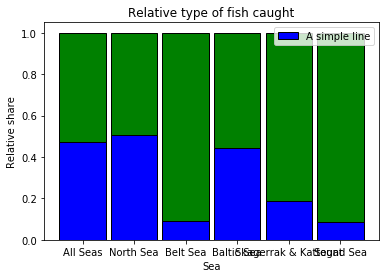

In [133]:
#Making dataplot of relative catches
import numpy as np
import matplotlib.pyplot as plt


Industry_Seas=(Relative_I_All, Relative_I_North_Sea, Relative_I_Belt_Sea, Relative_I_Baltic_Sea, Relative_I_SandK_Sea, Relative_I_Sound_Sea)
Consumption_Seas=(Relative_C_All, Relative_C_North_Sea, Relative_C_Belt_Sea, Relative_C_Baltic_Sea, Relative_C_SandK_Sea, Relative_C_Sound_Sea)

N=6
ind = np.arange(N)

p1 = plt.bar(ind, Industry_Seas, width=0.9, color='blue',edgecolor='black')
p2 = plt.bar(ind, Consumption_Seas, width=0.9, color='green',
             bottom=Industry_Seas, edgecolor='black')

plt.ylabel('Relative share')
plt.xlabel('Sea')
plt.title('Relative type of fish caught')
plt.xticks(ind,('All Seas','North Sea','Belt Sea','Baltic Sea','Skagerrak & Kattegat', 'Sound Sea'))
plt.legend(['A simple line'])
plt.show(p1,p2)
